In [19]:
#import everything necessary
import pandas as pd
import numpy as np
import sys
sys.path.append("../BerkeleySETI/data")
import os
import data
from data import loaders
import lightkurve as lk
from cesium import featurize
import warnings
import glob

warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [2]:
#set the directory location
data_dir = "/mnt/disks/lcs/"
data.mount_drive(data_dir)
data_dir = "/mnt/disks/lcs/tess-goddard-lcs/"

ref = pd.read_csv("../BerkeleySETI/inputdata/fulldataset.csv")
ref.head()

Disk mounted


,Filename,RA,Dec,TIC_ID,Sector,Camera,CCD,Magnitude,Label
0,tesslcs_sector_1_104/2_min_cadence_targets/tes...,316.544150,-33.615153,92709863,1,1,4,9.2496,NonEB
1,tesslcs_sector_1_104/2_min_cadence_targets/tes...,318.166964,-51.322785,79249902,1,2,4,9.0945,NonEB
2,tesslcs_sector_1_104/2_min_cadence_targets/tes...,96.580518,-62.648765,150391436,1,4,4,10.0789,NonEB
3,tesslcs_sector_1_104/2_min_cadence_targets/tes...,48.422141,-66.410695,31740373,1,3,4,8.8544,NonEB
4,tesslcs_sector_1_104/2_min_cadence_targets/tes...,87.388671,-54.192123,350586063,1,4,4,9.0271,NonEB


In the cell below, I used the 1st filename from fulldataset.csv, and appended that to the directory in which the light curves were kept in. I printed out the time, flux, flux_err, and quantity values of that light curve, as well as the resulting plot. Everything seems correct so far.

       time               flux             flux_err      quality
                                                                
------------------ ------------------ ------------------ -------
1325.3290840992058  28417.96427409742 4.8249492591877186       0
  1325.34991764871 28383.516203905878  4.827156332817881       0
1325.3707511967548 28349.474451601778  4.829697117824396       0
1325.3915847430767 28336.364641379987  4.832603729006132       0
1325.4124182874316 28332.009221969416  4.834987633372747       0
1325.4332518295967 28331.439312958693   4.83707249394297       0
1325.4540853693723  28316.55357379136  4.838304491381057       0
 1325.474918906592 28307.162123311904  4.840208792499319       0
1325.4957524411188 28311.809844672272 4.8439831417425685       0
1325.5165859728531 28319.293152742117  4.848141997466634       0
               ...                ...                ...     ...
1352.9745777632209  28198.69995906765  4.927813152397666       0
1352.9954103919254 28209.

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux'>

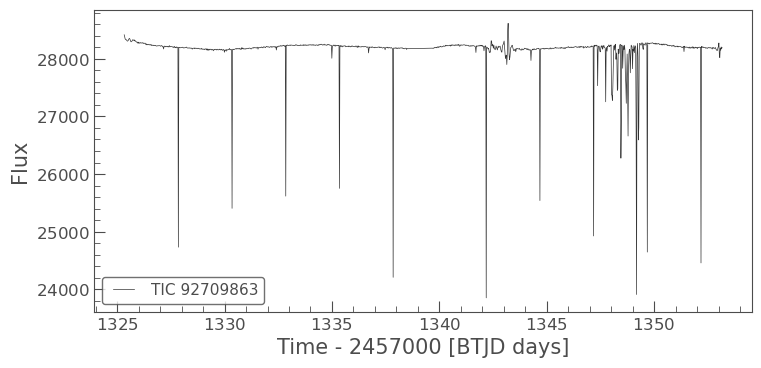

In [3]:
files = data_dir + ref.Filename.values
filepath = files[0]
lc = loaders.load_lc(filepath)
print(lc)
lc.plot()

Now, I will try to featurize my dataset. In the cell below, I decided to test out the featurize method on one light curve using amplitude as my sole features_to_use.

In [5]:
features_to_use = ["amplitude"]
fset_cesium = featurize.featurize_time_series(times=lc.time.value, values=lc.flux.value, errors=None, features_to_use=features_to_use)
print(fset_cesium)

feature    amplitude
channel            0
0        2383.729783


This seemed to work out well. Now lets try it with the whole dataset. Instead of individual light curves, I'm going to use a light curve collection to hold all my light curve objects. 

In [6]:
files = data_dir + ref.Filename.values
filepath = files[0]
lcc = loaders.LightCurveCollection(ref.Sector.values,
                                   ref.Camera.values,
                                   files,
                            )
lcc.load_all_lcs()

In [61]:
lcs=lcc.lcs

I then took the time values, flux values, and flux error values and put then in a dataframe below, and exported them as csv files for future uses.

In [62]:
times = [lc['time'].value for lc in lcs]
values = [lc['flux'].value for lc in lcs]
errors = [lc['flux_err'].value for lc in lcs]

In [68]:
column = ['times'] * 1221
df = pd.DataFrame(times, columns=column)
df.to_csv('inputdata/listoftimes.csv', index=False)

In [69]:
column2 = ['values'] * 1221
df2 = pd.DataFrame(values, columns=column2)
df2.to_csv('inputdata/listofvalues.csv', index=False)

In [70]:
column3 = ['errors'] * 1221
df3 = pd.DataFrame(errors, columns=column3)
df3.to_csv('inputdata/listoferrors.csv', index=False)

From now on, all we need to do is to just read the csv files if we want to do anything with the light curve collection, such as more featurizing.
<br>Update 5/16: Since Github has a file size limit of 100 MB, we will split each list into 6 parts. You will have to manually combine them after you clone it if you want the whole list.

In [7]:
#Do not do this step unless you saved the full list
times = pd.read_csv("../BerkeleySETI/inputdata/listoftimes.csv")
values = pd.read_csv("../BerkeleySETI/inputdata/listofvalues.csv")
errors = pd.read_csv("../BerkeleySETI/inputdata/listoferrors.csv")

In [9]:
times1 = times[:2500]

,times,times.1,times.2,times.3,times.4,times.5,times.6,times.7,times.8,times.9,...,times.1211,times.1212,times.1213,times.1214,times.1215,times.1216,times.1217,times.1218,times.1219,times.1220
0,1325.329084,1325.349918,1325.370751,1325.391585,1325.412418,1325.433252,1325.454085,1325.474919,1325.495752,1325.516586,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1325.328386,1325.349220,1325.370053,1325.390887,1325.411720,1325.432553,1325.453387,1325.474220,1325.495053,1325.515887,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325.343863,1325.364697,1325.385530,1325.406363,1325.427197,1325.448030,1325.468863,1325.489697,1325.510530,1325.531363,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325.345631,1325.366465,1325.387298,1325.408132,1325.428966,1325.449799,1325.470633,1325.491467,1325.512300,1325.533134,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325.343388,1325.364221,1325.385055,1325.405888,1325.426722,1325.447556,1325.468389,1325.489223,1325.510057,1325.530890,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,1325.344716,1325.365550,1325.386383,1325.407216,1325.428050,1325.448883,1325.469717,1325.490550,1325.511384,1325.532217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2496,1325.347353,1325.368187,1325.389020,1325.409854,1325.430687,1325.451521,1325.472355,1325.493188,1325.534856,1325.555689,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2497,1325.343913,1325.364747,1325.385581,1325.406414,1325.427248,1325.448081,1325.468915,1325.489749,1325.510582,1325.531416,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2498,1325.327863,1325.348696,1325.369530,1325.411198,1325.432032,1325.452866,1325.473699,1325.494533,1325.515367,1325.536201,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
times[2500:5000]

,times,times.1,times.2,times.3,times.4,times.5,times.6,times.7,times.8,times.9,...,times.1211,times.1212,times.1213,times.1214,times.1215,times.1216,times.1217,times.1218,times.1219,times.1220
2500,1325.345016,1325.365849,1325.386682,1325.407515,1325.428348,1325.449182,1325.470015,1325.490848,1325.511681,1325.532514,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2501,1325.329105,1325.349938,1325.370772,1325.391605,1325.412439,1325.433272,1325.454106,1325.474939,1325.495773,1325.516606,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2502,1325.343333,1325.364167,1325.385001,1325.405834,1325.426668,1325.447501,1325.468335,1325.489169,1325.510002,1325.530836,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2503,1325.328778,1325.349612,1325.370446,1325.391280,1325.412114,1325.432947,1325.453781,1325.474615,1325.495449,1325.516283,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2504,1325.327731,1325.348565,1325.369399,1325.411067,1325.431901,1325.452735,1325.473568,1325.494402,1325.515236,1325.536070,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1325.328827,1325.349661,1325.370495,1325.391329,1325.412163,1325.432997,1325.453832,1325.474666,1325.495500,1325.516334,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4996,1325.344621,1325.365454,1325.386287,1325.407120,1325.427953,1325.448786,1325.469619,1325.490452,1325.511285,1325.532119,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4997,1325.344592,1325.365426,1325.386259,1325.407093,1325.427926,1325.448760,1325.469594,1325.490427,1325.511261,1325.532094,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4998,1325.345534,1325.366368,1325.387201,1325.408034,1325.428867,1325.449700,1325.470533,1325.491366,1325.512199,1325.533033,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This is to make it possible to upload to GitHub due to size restrictions.

In [34]:
for x in range(6):
    times1 = times[(x*2500):((x+1)*2500)]
    times1.to_csv(f'inputdata/listoftimespt{x+1}.csv', index=False)

In [41]:
#Combined the individual files into listoftimestotal.csv
files = os.path.join(f'../BerkeleySETI/inputdata', 'listoftimespt*.csv')
files = sorted(glob.glob(files))
df4 = pd.concat(map(pd.read_csv, files), ignore_index=True)
df4.to_csv(f'../BerkeleySETI/inputdata/listoftimestotal.csv', index = False)

In [49]:
for x in range(6):
    errors1 = errors[(x*2500):((x+1)*2500)]
    errors1.to_csv(f'inputdata/listoferrorspt{x+1}.csv', index=False)

In [50]:
#Combined the individual files into listoftimestotal.csv
files = os.path.join(f'../BerkeleySETI/inputdata', 'listoferrorspt*.csv')
files = sorted(glob.glob(files))
df5 = pd.concat(map(pd.read_csv, files), ignore_index=True)
df5.to_csv(f'../BerkeleySETI/inputdata/listoferrorstotal.csv', index = False)

In [ ]:
for x in range(6):
    values1 = values[(x*2500):((x+1)*2500)]
    values1.to_csv(f'inputdata/listofvaluespt{x+1}.csv', index=False)

In [54]:
#Combined the individual files into listoftimestotal.csv
files = os.path.join(f'../BerkeleySETI/inputdata', 'listofvaluespt*.csv')
files = sorted(glob.glob(files))
df6 = pd.concat(map(pd.read_csv, files), ignore_index=True)
df6.to_csv(f'../BerkeleySETI/inputdata/listofvaluestotal.csv', index = False)

In [57]:
#This should be the same as the one above
times = pd.read_csv("../BerkeleySETI/inputdata/listoftimestotal.csv")
errors = pd.read_csv("../BerkeleySETI/inputdata/listoferrorstotal.csv")
values = pd.read_csv("../BerkeleySETI/inputdata/listofvaluestotal.csv")

Below, I tried to featurize the first light curve using all the features I plan on using, after removing all the zero values, which messes with the featurizing as shown below.

In [5]:
x= times.values[0][~np.isnan(times.values[0])]
y= values.values[0][~np.isnan(values.values[0])]
z= errors.values[0][~np.isnan(errors.values[0])]

In [6]:
features_to_use = ['amplitude','flux_percentile_ratio_mid20','flux_percentile_ratio_mid35',
                   'flux_percentile_ratio_mid50','flux_percentile_ratio_mid65','flux_percentile_ratio_mid80', 
                   'percent_beyond_1_std','period_fast','skew','std','weighted_average',
                   'fold2P_slope_10percentile','fold2P_slope_90percentile','freq1_freq','freq2_freq','freq3_freq',
                   'freq1_amplitude1','freq1_amplitude2','freq2_amplitude1','freq2_amplitude2','freq3_amplitude1',
                   'freq3_amplitude2','freq_model_max_delta_mags','freq_signif_ratio_21','freq_signif_ratio_31',
                   'freq_varrat','freq_y_offset','linear_trend','p2p_ssqr_diff_over_var']
fset = featurize.featurize_time_series(times=x,values=y,errors=z,features_to_use=features_to_use)
#fset = featurize.featurize_time_series(times=times[6000:6500],values=values[6000:6500],errors=errors[6000:6500],features_to_use=features_to_use)

This is what it looks like after featurizing. It seems correct, however we will repeat this for a list of many more light curves. 

In [9]:
fset

feature,amplitude,flux_percentile_ratio_mid20,flux_percentile_ratio_mid35,flux_percentile_ratio_mid50,flux_percentile_ratio_mid65,flux_percentile_ratio_mid80,percent_beyond_1_std,period_fast,skew,std,...,freq2_amplitude2,freq3_amplitude1,freq3_amplitude2,freq_model_max_delta_mags,freq_signif_ratio_21,freq_signif_ratio_31,freq_varrat,freq_y_offset,linear_trend,p2p_ssqr_diff_over_var
channel,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0.012684,0.163961,0.28588,0.415386,0.525836,0.712578,0.185622,7.787574,1.020868,0.001534,...,0.00004,0.000299,0.000036,3.568613e-12,0.750989,0.38483,0.000001,0.000035,-8.936690e-07,0.540239


In [10]:
len(errors.values[0][~np.isnan(errors.values[0])&(errors.values[0]>0)])

932

Below, I removed all the zeroes from the dataset. I set xlist, ylist, and zlist to the time values, flux values, and flux error values respectively, except all the zeroes are removed.

In [11]:
xlist = [times.values[index][~np.isnan(times.values[index])&(values.values[index]>0)] for index in range(len(times))]
ylist = [values.values[index][~np.isnan(values.values[index])&(values.values[index]>0)] for index in range(len(values))]
zlist = [errors.values[index][~np.isnan(errors.values[index])&(values.values[index]>0)] for index in range(len(errors))]

For reference, this is what the error looks like without removing all the zeroes. (below)

/opt/conda/lib/python3.7/site-packages/gatspy/periodic/_least_squares_mixin.py:33: RuntimeWarning: divide by zero encountered in true_divide
  return np.average(y, weights=1 / dy ** 2)
/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:412: RuntimeWarning: invalid value encountered in double_scalars
  avg = np.multiply(a, wgt, dtype=result_dtype).sum(axis)/scl
/opt/conda/lib/python3.7/site-packages/gatspy/periodic/lomb_scargle_fast.py:254: RuntimeWarning: divide by zero encountered in true_divide
  w = 1. / (dy ** 2)
/opt/conda/lib/python3.7/site-packages/gatspy/periodic/lomb_scargle_fast.py:255: RuntimeWarning: invalid value encountered in true_divide
  w /= w.sum()
/opt/conda/lib/python3.7/site-packages/gatspy/periodic/lomb_scargle_fast.py:254: RuntimeWarning: divide by zero encountered in true_divide
  w = 1. / (dy ** 2)
/opt/conda/lib/python3.7/site-packages/gatspy/periodic/lomb_scargle_fast.py:255: RuntimeWarning: invalid value encountered in true_divide
  w /= w.su

KeyboardInterrupt: 

In [12]:
xlist[0]

array([1325.3290841 , 1325.34991765, 1325.3707512 , 1325.39158474,
       1325.41241829, 1325.43325183, 1325.45408537, 1325.47491891,
       1325.49575244, 1325.51658597, 1325.5374195 , 1325.55825303,
       1325.57908655, 1325.59992007, 1325.62075359, 1325.6415871 ,
       1325.66242062, 1325.68325413, 1325.70408763, 1325.72492114,
       1325.74575465, 1325.76658815, 1325.78742165, 1325.80825515,
       1325.84992215, 1325.87075566, 1325.89158916, 1325.91242266,
       1325.93325616, 1325.95408967, 1325.99575668, 1326.01659019,
       1326.0374237 , 1326.05825721, 1326.07909072, 1326.09992423,
       1326.12075775, 1326.14159126, 1326.16242478, 1326.1832583 ,
       1326.20409182, 1326.22492534, 1326.24575886, 1326.26659238,
       1326.2874259 , 1326.30825942, 1326.32909294, 1326.37075997,
       1326.39159348, 1326.4332605 , 1326.45409401, 1326.47492751,
       1326.49576101, 1326.51659451, 1326.53742801, 1326.5582615 ,
       1326.57909499, 1326.64159544, 1326.66242892, 1326.70409

This was me testing with 6 light curves. No errors so far.

In [14]:
x2= times.values[0][~np.isnan(times.values[0])]
y2= values.values[0][~np.isnan(values.values[0])]
z2= errors.values[0][~np.isnan(errors.values[0])]
fset3 = featurize.featurize_time_series(times=x2,values=y2,errors=z2,features_to_use=features_to_use)
#for index in range(len(times)):
for index in range(6):
    x2= times.values[index][~np.isnan(times.values[index])]
    y2= values.values[index][~np.isnan(values.values[index])]
    z2= errors.values[index][~np.isnan(errors.values[index])]
    print(index)
    fset4 = featurize.featurize_time_series(times=x2,values=y2,errors=z2,features_to_use=features_to_use)
    print(fset4)
    fset3.append(fset4)

0
feature amplitude flux_percentile_ratio_mid20 flux_percentile_ratio_mid35  \
channel         0                           0                           0   
0        0.012684                    0.163961                     0.28588   

feature flux_percentile_ratio_mid50 flux_percentile_ratio_mid65  \
channel                           0                           0   
0                          0.415386                    0.525836   

feature flux_percentile_ratio_mid80 percent_beyond_1_std period_fast  \
channel                           0                    0           0   
0                          0.712578             0.185622    7.787574   

feature      skew       std  ... freq2_amplitude2 freq3_amplitude1  \
channel         0         0  ...                0                0   
0        1.020868  0.001534  ...          0.00004         0.000299   

feature freq3_amplitude2 freq_model_max_delta_mags freq_signif_ratio_21  \
channel                0                         0           

In [15]:
fset3

feature,amplitude,flux_percentile_ratio_mid20,flux_percentile_ratio_mid35,flux_percentile_ratio_mid50,flux_percentile_ratio_mid65,flux_percentile_ratio_mid80,percent_beyond_1_std,period_fast,skew,std,...,freq2_amplitude2,freq3_amplitude1,freq3_amplitude2,freq_model_max_delta_mags,freq_signif_ratio_21,freq_signif_ratio_31,freq_varrat,freq_y_offset,linear_trend,p2p_ssqr_diff_over_var
channel,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0.012684,0.163961,0.28588,0.415386,0.525836,0.712578,0.185622,7.787574,1.020868,0.001534,...,0.00004,0.000299,0.000036,3.568613e-12,0.750989,0.38483,0.000001,0.000035,-8.936690e-07,0.540239


However, it does not seem like I can append fset4 to fset 3. I don't think that'll be much of an issue though.

Now, I'm going to try to featurize the whole dataset.

In [51]:
features_to_use = ['amplitude','flux_percentile_ratio_mid20','flux_percentile_ratio_mid35',
                   'flux_percentile_ratio_mid50','flux_percentile_ratio_mid65','flux_percentile_ratio_mid80', 
                   'percent_beyond_1_std','period_fast','skew','std','weighted_average',
                   'fold2P_slope_10percentile','fold2P_slope_90percentile','freq1_freq','freq2_freq','freq3_freq',
                   'freq1_amplitude1','freq1_amplitude2','freq2_amplitude1','freq2_amplitude2','freq3_amplitude1',
                   'freq3_amplitude2','freq_model_max_delta_mags','freq_signif_ratio_21','freq_signif_ratio_31',
                   'freq_varrat','freq_y_offset','linear_trend','p2p_ssqr_diff_over_var']
fset = featurize.featurize_time_series(times=xlist,values=ylist,errors=zlist,features_to_use=features_to_use)

In [65]:
fset.to_csv('Backup/featureswithchannel.csv', index=False)

I saved the feature set to the Backup folder, since I still need to fix some issues with the csv file. This will do as a backup file though.

In [59]:
fset

feature,amplitude,flux_percentile_ratio_mid20,flux_percentile_ratio_mid35,flux_percentile_ratio_mid50,flux_percentile_ratio_mid65,flux_percentile_ratio_mid80,percent_beyond_1_std,period_fast,skew,std,...,freq2_amplitude2,freq3_amplitude1,freq3_amplitude2,freq_model_max_delta_mags,freq_signif_ratio_21,freq_signif_ratio_31,freq_varrat,freq_y_offset,linear_trend,p2p_ssqr_diff_over_var
channel,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0.012684,0.163961,0.285880,0.415386,0.525836,0.712578,0.185622,7.787574,1.020868,0.001534,...,0.000040,0.000299,0.000036,3.568613e-12,0.750989,0.384830,1.312337e-06,0.000035,-8.936690e-07,0.540239
1,0.001207,0.152380,0.262680,0.389341,0.533191,0.738740,0.299694,4.912254,0.263080,0.000345,...,0.000066,0.000123,0.000027,1.160281e-12,0.800199,0.758214,9.056493e-08,-0.000018,-2.535919e-06,0.478120
2,0.003081,0.135780,0.246591,0.386488,0.524250,0.749137,0.211211,4.993271,1.729801,0.000466,...,0.000038,0.000148,0.000018,2.330982e-05,0.963386,0.810325,1.807777e-07,0.000019,3.888117e-08,0.840066
3,0.002202,0.134937,0.253746,0.394373,0.586548,0.795296,0.320448,7.113250,0.271945,0.000695,...,0.000051,0.000166,0.000042,4.549006e-12,0.640908,0.515488,3.799763e-07,-0.000009,4.022431e-06,0.168574
4,0.001871,0.140771,0.250712,0.372417,0.527411,0.732534,0.251251,8.075771,0.571756,0.000386,...,0.000018,0.000114,0.000007,1.560948e-12,0.926832,0.691535,1.229217e-07,0.000042,5.929249e-06,0.441759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13769,0.178571,0.076116,0.149593,0.228295,0.309725,0.702969,0.138577,0.397166,-1.772855,0.077305,...,0.016632,0.023115,0.006572,1.115763e-01,0.949433,0.881722,1.890872e-03,0.000169,3.307986e-04,0.242998
13770,0.112893,0.285913,0.491214,0.662482,0.794948,0.911698,0.456328,0.286852,0.057986,0.033910,...,0.000766,0.002017,0.000140,1.092240e-10,0.586083,0.303540,4.785279e-05,0.000280,2.234154e-05,0.279774
13771,0.068547,0.125802,0.242275,0.392951,0.562011,0.739021,0.064607,4.225635,-5.563638,0.014679,...,0.002753,0.004446,0.002638,8.532417e-10,0.804247,0.792345,1.840823e-04,-0.000012,-1.204208e-04,0.233215


That row of 0 named channel is really annoying me. I'm going to remove it.

In [4]:
feature = pd.read_csv('../BerkeleySETI/Backup/featureswithchannel.csv')
  
features = feature.iloc[1:]
features

,amplitude,flux_percentile_ratio_mid20,flux_percentile_ratio_mid35,flux_percentile_ratio_mid50,flux_percentile_ratio_mid65,flux_percentile_ratio_mid80,percent_beyond_1_std,period_fast,skew,std,...,freq2_amplitude2,freq3_amplitude1,freq3_amplitude2,freq_model_max_delta_mags,freq_signif_ratio_21,freq_signif_ratio_31,freq_varrat,freq_y_offset,linear_trend,p2p_ssqr_diff_over_var
1,0.012684,0.163961,0.285880,0.415386,0.525836,0.712578,0.185622,7.787574,1.020868,0.001534,...,0.000040,0.000299,0.000036,3.568613e-12,0.750989,0.384830,1.312337e-06,0.000035,-8.936690e-07,0.540239
2,0.001207,0.152380,0.262680,0.389341,0.533191,0.738740,0.299694,4.912254,0.263080,0.000345,...,0.000066,0.000123,0.000027,1.160281e-12,0.800199,0.758214,9.056493e-08,-0.000018,-2.535919e-06,0.478120
3,0.003081,0.135780,0.246591,0.386488,0.524250,0.749137,0.211211,4.993271,1.729801,0.000466,...,0.000038,0.000148,0.000018,2.330982e-05,0.963386,0.810325,1.807777e-07,0.000019,3.888117e-08,0.840066
4,0.002202,0.134937,0.253746,0.394373,0.586548,0.795296,0.320448,7.113250,0.271945,0.000695,...,0.000051,0.000166,0.000042,4.549006e-12,0.640908,0.515488,3.799763e-07,-0.000009,4.022431e-06,0.168574
5,0.001871,0.140771,0.250712,0.372417,0.527411,0.732534,0.251251,8.075771,0.571756,0.000386,...,0.000018,0.000114,0.000007,1.560948e-12,0.926832,0.691535,1.229217e-07,0.000042,5.929249e-06,0.441759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13770,0.178571,0.076116,0.149593,0.228295,0.309725,0.702969,0.138577,0.397166,-1.772855,0.077305,...,0.016632,0.023115,0.006572,1.115763e-01,0.949433,0.881722,1.890872e-03,0.000169,3.307986e-04,0.242998
13771,0.112893,0.285913,0.491214,0.662482,0.794948,0.911698,0.456328,0.286852,0.057986,0.033910,...,0.000766,0.002017,0.000140,1.092240e-10,0.586083,0.303540,4.785279e-05,0.000280,2.234154e-05,0.279774
13772,0.068547,0.125802,0.242275,0.392951,0.562011,0.739021,0.064607,4.225635,-5.563638,0.014679,...,0.002753,0.004446,0.002638,8.532417e-10,0.804247,0.792345,1.840823e-04,-0.000012,-1.204208e-04,0.233215
13773,0.014173,0.090308,0.165574,0.248457,0.358730,0.557528,0.048957,33.931746,-4.672119,0.003971,...,0.000608,0.001365,0.000680,6.670623e-11,0.728239,0.841331,9.713507e-06,-0.001752,5.443738e-04,0.045893


Great, it's removed! Now I'm just going to save it for future references.

In [5]:
features.to_csv('inputdata/features.csv', index=False)

In [85]:
finalfset = pd.read_csv('../BerkeleySETI/inputdata/features.csv')

Finally, I think I'm ready for some actual machine learning models. I think what I'm going to do is follow what Alex did, and use support vector machines (svm) first.

In [ ]:
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [78]:
ref = ref.sample(frac=1)
ref

,Filename,RA,Dec,TIC_ID,Sector,Camera,CCD,Magnitude,Label
8917,tesslcs_sector_16_104/2_min_cadence_targets/te...,313.510877,72.580522,364186197,16,2,1,8.823740,EB
12631,tesslcs_sector_11_104/2_min_cadence_targets/te...,123.437610,-67.930523,307085577,11,4,2,11.144500,EB
3532,tesslcs_sector_1_104/2_min_cadence_targets/tes...,340.089072,-37.350956,160064321,1,1,2,9.640500,NonEB
12945,tesslcs_sector_8_104/2_min_cadence_targets/tes...,125.638864,-39.473178,183469904,8,3,2,9.123300,EB
12509,tesslcs_sector_11_104/2_min_cadence_targets/te...,104.245436,-59.161133,279323859,11,4,2,11.418500,EB
...,...,...,...,...,...,...,...,...,...
5377,tesslcs_sector_18_104/2_min_cadence_targets/te...,14.487422,60.104161,255802749,18,2,2,8.886520,EB
9720,tesslcs_sector_20_104/2_min_cadence_targets/te...,105.021388,42.184188,192111972,20,1,2,8.014300,EB
10356,tesslcs_sector_13_104/2_min_cadence_targets/te...,58.333296,-79.809780,394699148,13,3,4,8.636599,EB
1678,tesslcs_sector_1_104/2_min_cadence_targets/tes...,331.319563,-30.374823,80142107,1,1,3,8.487800,NonEB


Below, I split the dataset into two categories: with 80% of the data being the training set, and 20% of it being the test set. This is just a temporary testset, as later I will incorporate cross validation.

In [79]:
train, test = train_test_split(np.arange(len(ref['Label'])), train_size=0.8)

In [117]:
len(train)

11019

In [83]:
len(test)

2755

In [87]:
X_train = finalfset.iloc[train]
y_train = ref['Label'].iloc[train]
X_test = finalfset.iloc[test]
y_test = ref['Label'].iloc[test]

I split the dataset into 4 dataframes, explained below.
<br> X_train contains all of the features of the training set.
<br>y_train contains all of the labels of the training set.
<br>X_test contains all of the features of the test set.
<br>y_test contains all of the labels of the test set.

In [88]:
X_train

,amplitude,flux_percentile_ratio_mid20,flux_percentile_ratio_mid35,flux_percentile_ratio_mid50,flux_percentile_ratio_mid65,flux_percentile_ratio_mid80,percent_beyond_1_std,period_fast,skew,std,...,freq2_amplitude2,freq3_amplitude1,freq3_amplitude2,freq_model_max_delta_mags,freq_signif_ratio_21,freq_signif_ratio_31,freq_varrat,freq_y_offset,linear_trend,p2p_ssqr_diff_over_var
392,0.031510,0.142119,0.241510,0.383144,0.543854,0.786874,0.168871,1.590749,5.182484,0.002996,...,3.566909e-05,0.000458,0.000044,5.292690e-12,0.890414,0.887272,8.943403e-06,2.393692e-05,0.000030,1.067672
11726,0.001745,0.171036,0.281551,0.410056,0.560729,0.779829,0.313836,0.139390,-0.272811,0.000569,...,1.916974e-06,0.000083,0.000009,3.664225e-11,0.324366,0.265262,1.630689e-07,5.893791e-06,0.000003,1.460669
3622,0.054287,0.140450,0.244367,0.363609,0.525922,0.745096,0.016094,0.166735,-10.461177,0.003108,...,1.880550e-05,0.000275,0.000015,3.556826e-12,1.008892,0.995359,7.066698e-06,6.224945e-06,-0.000004,0.683094
2891,0.015532,0.137992,0.264948,0.402747,0.588842,0.799437,0.020101,0.161988,-12.526735,0.000896,...,6.668642e-06,0.000067,0.000002,2.363322e-13,0.876142,0.815928,6.043968e-07,-5.501478e-07,-0.000003,1.155334
441,0.003413,0.138783,0.240076,0.352898,0.522149,0.741483,0.211597,8.297287,3.527988,0.000352,...,1.419964e-05,0.000060,0.000003,1.061717e-12,0.759393,0.535314,1.167823e-07,-1.559512e-06,0.000004,1.176286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11105,0.004297,0.041998,0.070064,0.105930,0.166273,0.246674,0.065537,1.429974,-3.524447,0.001463,...,2.548604e-04,0.000583,0.000305,1.908858e-03,0.830036,0.916569,1.524478e-06,3.377374e-06,-0.000001,0.257110
5175,0.000930,0.163060,0.286026,0.414710,0.565839,0.750759,0.308838,8.971648,0.221745,0.000278,...,9.986870e-07,0.000051,0.000003,1.336875e-12,0.416102,0.431808,6.519521e-08,2.226824e-05,0.000003,1.496182
8185,0.016072,0.290858,0.490026,0.650149,0.776209,0.900109,0.445055,1.638695,0.100988,0.005570,...,1.863499e-04,0.000896,0.000389,7.374455e-11,0.574897,0.690204,1.921490e-06,1.941182e-04,-0.000015,0.041450
1,0.001207,0.152380,0.262680,0.389341,0.533191,0.738740,0.299694,4.912254,0.263080,0.000345,...,6.556605e-05,0.000123,0.000027,1.160281e-12,0.800199,0.758214,9.056493e-08,-1.837090e-05,-0.000003,0.478120


In [89]:
y_train

7019        EB
1545     NonEB
7055        EB
12098       EB
9003        EB
         ...  
10081       EB
3974     NonEB
7381        EB
12631       EB
9722        EB
Name: Label, Length: 11019, dtype: object

In [90]:
X_test

,amplitude,flux_percentile_ratio_mid20,flux_percentile_ratio_mid35,flux_percentile_ratio_mid50,flux_percentile_ratio_mid65,flux_percentile_ratio_mid80,percent_beyond_1_std,period_fast,skew,std,...,freq2_amplitude2,freq3_amplitude1,freq3_amplitude2,freq_model_max_delta_mags,freq_signif_ratio_21,freq_signif_ratio_31,freq_varrat,freq_y_offset,linear_trend,p2p_ssqr_diff_over_var
9307,0.505198,0.096755,0.167061,0.256768,0.348417,0.493602,0.000000,27.041613,-30.068187,0.032601,...,0.089875,0.070826,1.516040e-02,9.869910e-01,0.591563,0.406355,5.177237e-02,5.728739e-01,4.453963e-03,2.061124
13336,0.100004,0.058285,0.107754,0.157655,0.238745,0.592401,0.162522,2.320235,-4.446275,0.017077,...,0.000952,0.002480,8.313908e-05,7.798667e-11,0.901159,0.694631,1.153159e-04,4.046166e-05,-1.071575e-05,0.227372
6800,0.003988,0.115877,0.194433,0.286770,0.402226,0.594600,0.120635,1.598916,-1.735418,0.000771,...,0.000057,0.000210,6.555333e-05,2.627375e-12,0.822735,0.839891,4.226255e-07,-5.217683e-06,-1.327180e-05,0.254938
5321,0.041061,0.064205,0.117252,0.176207,0.247667,0.386111,0.060228,4.011374,-5.028501,0.009567,...,0.000476,0.002740,6.192023e-04,1.091957e-10,0.920691,0.921013,8.348802e-05,-3.016590e-05,-5.991762e-05,0.047192
3142,0.000897,0.147045,0.272311,0.395543,0.544731,0.779360,0.261477,11.627263,-1.218187,0.000127,...,0.000006,0.000022,6.771110e-07,8.724592e-14,0.979898,0.783632,1.561596e-08,1.863037e-08,-2.417024e-07,1.323127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.002167,0.143319,0.263948,0.391061,0.558562,0.768024,0.253253,5.307807,2.237836,0.000312,...,0.000006,0.000064,1.335347e-05,1.724071e-12,0.638512,0.642879,9.086616e-08,2.355897e-06,1.208157e-06,1.245631
2295,0.001269,0.158642,0.270211,0.400541,0.547097,0.756223,0.290356,5.245571,-0.325688,0.000299,...,0.000057,0.000070,1.749565e-05,2.939058e-12,0.933013,0.730406,8.273949e-08,2.853182e-06,-3.956241e-07,1.433637
3286,0.000748,0.135343,0.254654,0.378713,0.539455,0.747500,0.286145,6.175109,0.405661,0.000147,...,0.000004,0.000023,1.896277e-06,1.218777e-12,0.678763,0.436578,2.002127e-08,5.107541e-06,7.821337e-07,1.542786
4115,0.031946,0.110937,0.202391,0.295518,0.437807,0.663786,0.054721,2.615907,-1.585219,0.003138,...,0.000001,0.000276,1.475098e-05,6.478728e-13,0.913146,0.911115,8.441181e-06,1.318597e-05,3.533596e-06,1.444929


In [91]:
y_test

10756       EB
12305       EB
6424        EB
4326     NonEB
5418        EB
         ...  
5492        EB
12261       EB
2661     NonEB
4306     NonEB
5164     NonEB
Name: Label, Length: 2755, dtype: object

From scikit-learn's API:
<br>"The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters. For this, it enables setting parameters of the various steps using their names and the parameter name separated by a '__', as in the example below. A step’s estimator may be replaced entirely by setting the parameter with its name to another estimator, or a transformer removed by setting it to 'passthrough' or None."

In [132]:
#creating the pipeline object
svc = make_pipeline(StandardScaler(),svm.LinearSVC(dual=False))

In [129]:
svc

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('linearsvc', LinearSVC(dual=False))])

In [133]:
svc.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(dual=False))])

In [97]:
np.any(np.isnan(X_train))

True

In [99]:
np.all(np.isfinite(X_train))

False

In [111]:
for i in range (len(X_train)):
    if (np.any(np.isnan(X_train.iloc[i]))):
        print (i)

8
72
161
704
803
1027
1058
1234
1253
1255
1303
1528
1550
1570
1600
1729
1768
1887
2154
2210
2340
2397
2544
2566
2748
2919
3130
3169
3294
3304
3320
3504
3551
3654
3699
3757
3963
4037
4301
4536
4548
4825
4863
5099
5144
5148
5252
5257
5287
5327
5617
5958
5976
6130
6139
6210
6212
6256
6296
6390
6394
6499
6571
6734
6766
6861
7131
7282
7453
7482
7544
7643
7679
7901
8098
8205
8647
8792
8994
8999
9220
9226
9266
9340
9342
9422
9563
9578
9647
9675
9682
9934
10019
10051
10072
10096
10098
10163
10196
10272
10323
10382
10467
10700
10903
10925


In [110]:
X_train.iloc[8]

amplitude                       0.502790
flux_percentile_ratio_mid20     0.038295
flux_percentile_ratio_mid35     0.119845
flux_percentile_ratio_mid50     0.182535
flux_percentile_ratio_mid65     0.230480
flux_percentile_ratio_mid80     0.496262
percent_beyond_1_std            0.000000
period_fast                    27.119323
skew                          -24.085485
std                             0.034504
weighted_average                     NaN
fold2P_slope_10percentile      -0.226327
fold2P_slope_90percentile       0.215623
freq1_freq                      0.071725
freq2_freq                     24.031600
freq3_freq                      0.090116
freq1_amplitude1                0.421939
freq1_amplitude2                0.215262
freq2_amplitude1                0.135478
freq2_amplitude2                0.082295
freq3_amplitude1                0.092062
freq3_amplitude2                0.040625
freq_model_max_delta_mags       1.000367
freq_signif_ratio_21            0.627422
freq_signif_rati

Apparently, there seems to be some nan values in the features list. I'm not sure if this will interfere with the ML algorithm, so just to be safe, I'm going to remove them.

In [134]:
X_train = X_train.dropna()
y_train = ref['Label'].iloc[X_train.index]

In [135]:
svc.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(dual=False))])

In [136]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [137]:
X_test = X_test.dropna()
y_test = ref['Label'].iloc[X_test.index]
y_pred = svc.predict(X_test)

The algorithm seems to work, time to test out the accuracy!

In [139]:
print(accuracy_score(y_test,y_pred)) # Fraction of classifications that were correct
print(precision_score(y_test,y_pred,pos_label='EB'))

0.6208791208791209
0.6219691403379868


4/18/2022 - Got my first ML result! The accuracy is much lower than I expected, following very similar steps to the way Alex did it, but with different datasets. I wonder what could have caused the large difference?